In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Cleaning

In [2]:
# Reading merged data Arabica 98% and Robusta 2% of records
df_quality = pd.read_csv("data/merged_data_cleaned.csv")
df_quality.head()

,Unnamed: 0,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,0,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,2,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,3,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,4,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0


In [3]:
################### Quality Measures - Features ####################
# Aroma
# Flavor
# Aftertaste
# Acidity
# Body
# Balance
# Uniformity
# Cup Cleanliness
# Sweetness
# Moisture
# Defects
################### Bean Metadata - Labels ####################
# Species (arabica / robusta)
# Country of Origin

df_quality = df_quality[['Country.of.Origin', 'Species', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 
                         'Body', 'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness',
                         'Moisture', 'Category.One.Defects', 'Category.Two.Defects']]

In [4]:
# check for null values in data
df_quality.isnull().sum()

Country.of.Origin       1
Species                 0
Aroma                   0
Flavor                  0
Aftertaste              0
Acidity                 0
Body                    0
Balance                 0
Uniformity              0
Clean.Cup               0
Sweetness               0
Moisture                0
Category.One.Defects    0
Category.Two.Defects    0
dtype: int64

In [5]:
# From Data, it was evident that the only missing country was Columbia 
# because the Owner "racafe & cia s.c.a" has records in Columbia only 
# and In.Country.Partner column value "AlmacafÃ©" is only for Columbia and United States

df_quality['Country.of.Origin'] = df_quality['Country.of.Origin'].fillna('Colombia')
# Checking again for null values in 'Country.of.Origin' column
df_quality['Country.of.Origin'].isnull().sum()

0

Data is not fully normaly distributed. There is skewness. Algorithms will perform better with a normalized or scaled dataset.

There are outliers in data, so better to select Models which are insensitive to outliers like SVC, Decision Tree, and Ensembling Techniques

### Dummy Encoding Species to add it to feature columns

In [6]:
df_quality['Species'] = pd.get_dummies(df_quality['Species'], drop_first=True)
# Arabica - 0,  Robusta - 1
df_quality.head()

,Country.of.Origin,Species,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Moisture,Category.One.Defects,Category.Two.Defects
0,Ethiopia,0,8.67,8.83,8.67,8.75,8.50,8.42,10.0,10.0,10.0,0.12,0,0
1,Ethiopia,0,8.75,8.67,8.50,8.58,8.42,8.42,10.0,10.0,10.0,0.12,0,1
2,Guatemala,0,8.42,8.50,8.42,8.42,8.33,8.42,10.0,10.0,10.0,0.00,0,0
3,Ethiopia,0,8.17,8.58,8.42,8.42,8.50,8.25,10.0,10.0,10.0,0.11,0,2
4,Ethiopia,0,8.25,8.50,8.25,8.50,8.42,8.33,10.0,10.0,10.0,0.12,0,2


In [7]:
df_qual = df_quality.copy()
from sklearn.preprocessing import LabelEncoder

df_qual = df_qual.apply(LabelEncoder().fit_transform)

<AxesSubplot:>

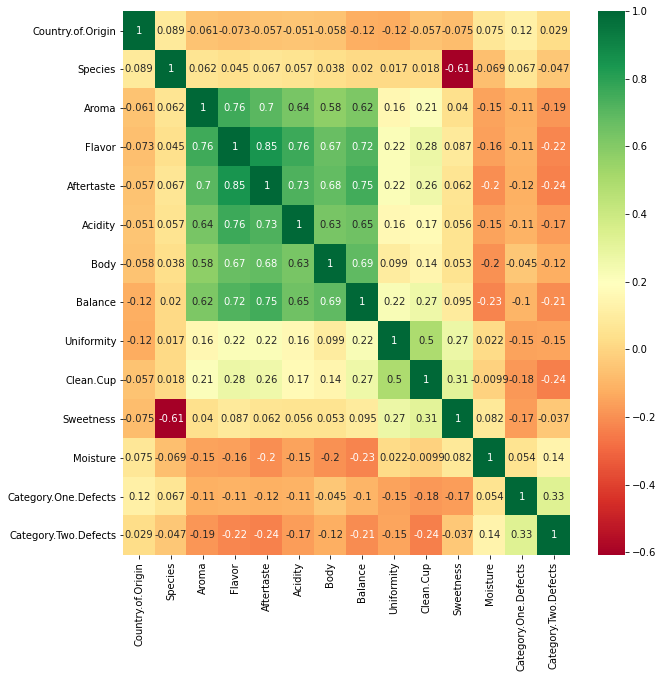

In [8]:
# correlation matrix
corr_mat = df_qual.corr()
top_corr_features = corr_mat.index
fig = plt.figure(figsize=(10,10))
fig.patch.set_facecolor('white')
# heatmap
sns.heatmap(df_qual[top_corr_features].corr(), annot=True, cmap="RdYlGn")

In [9]:
# From the Correlation heatmap we can see Flavor column is highly correlated to many other features
# So we can remove that feature from training the model. It improved overall accuracy by 2% 
# but after SMOTE it doesn't matter

df_qual.drop('Flavor', axis = 1, inplace = True) 
df_qual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339 entries, 0 to 1338
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Country.of.Origin     1339 non-null   int32
 1   Species               1339 non-null   int64
 2   Aroma                 1339 non-null   int64
 3   Aftertaste            1339 non-null   int64
 4   Acidity               1339 non-null   int64
 5   Body                  1339 non-null   int64
 6   Balance               1339 non-null   int64
 7   Uniformity            1339 non-null   int64
 8   Clean.Cup             1339 non-null   int64
 9   Sweetness             1339 non-null   int64
 10  Moisture              1339 non-null   int64
 11  Category.One.Defects  1339 non-null   int64
 12  Category.Two.Defects  1339 non-null   int64
dtypes: int32(1), int64(12)
memory usage: 130.9 KB


In [10]:
# Checking for imbalanced Dataset
df_qual['Country.of.Origin'].value_counts()

19    236
3     184
9     181
0     132
27     75
32     73
11     53
4      51
8      44
28     40
30     36
29     32
21     26
15     25
7      21
13     20
2      16
12     14
17     11
24     10
31     10
20      8
34      8
10      6
25      5
33      4
22      4
16      3
6       3
1       2
18      1
26      1
23      1
14      1
5       1
35      1
Name: Country.of.Origin, dtype: int64

In [11]:
# Changing Names of Countries with very few Records as 'Other' in dataframe and in a dictionary(to use in SMOTE)
df_countries = df_quality.copy()
countries, counts = np.unique(df_countries['Country.of.Origin'], return_counts=True)
country_counts = dict(zip(countries, counts))
country_counts_copy = country_counts.copy()
country_counts_copy["Other"] = 0
key_list = []
for key, value in country_counts.items():
    if value < 10:
        df_countries.loc[(df_countries['Country.of.Origin'] == key),'Country.of.Origin']='Other'
        key_list.append(key)
        country_counts_copy["Other"] = country_counts_copy["Other"] + value
        
list(map(country_counts_copy.pop, key_list))
df_countries['Country.of.Origin'].value_counts()

Mexico                          236
Colombia                        184
Guatemala                       181
Brazil                          132
Taiwan                           75
United States (Hawaii)           73
Honduras                         53
Costa Rica                       51
Other                            49
Ethiopia                         44
Tanzania, United Republic Of     40
Uganda                           36
Thailand                         32
Nicaragua                        26
Kenya                            25
El Salvador                      21
Indonesia                        20
China                            16
India                            14
Malawi                           11
United States                    10
Peru                             10
Name: Country.of.Origin, dtype: int64

## Select your features (columns)

In [12]:
# Set features. This will also be used as your x values.
data = df_countries.values
X = df_countries.iloc[:, 1:12]
y = df_countries.iloc[:, 0]
print(X.shape, y.shape)

(1339, 11) (1339,)


# Train Test Split

In [13]:
# Creating train test split on oversampled data
from sklearn.model_selection import train_test_split

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, random_state=13, test_size=0.1)

## Pre-processing
Scale and Normalize the data using the StandardScaler

In [14]:
from sklearn.preprocessing import StandardScaler
# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train_full)

# Transform the training and testing data using the X_scaler
X_train_scaled = X_scaler.transform(X_train_full)
X_test_scaled = X_scaler.transform(X_test)

#### Imbalanced Dataset
##### Synthethetic Minority Over sampling Technique (SMOTE)

In [15]:
# Over sampling
from imblearn.over_sampling import SMOTE

strategy_dict = {x: 1500 for x in country_counts_copy}
synth = SMOTE(random_state=13, sampling_strategy= strategy_dict)
X_resampled, y_resampled = synth.fit_resample(X_train_scaled, y_train_full)

from collections import Counter
print("Before SMOTE count:" , Counter(y_train_full))
print("After SMOTE count:" , Counter(y_resampled))

Before SMOTE count: Counter({'Mexico': 213, 'Colombia': 164, 'Guatemala': 163, 'Brazil': 118, 'United States (Hawaii)': 70, 'Taiwan': 66, 'Other': 46, 'Honduras': 45, 'Costa Rica': 43, 'Ethiopia': 39, 'Tanzania, United Republic Of': 33, 'Uganda': 32, 'Thailand': 30, 'Kenya': 25, 'Nicaragua': 22, 'El Salvador': 21, 'Indonesia': 18, 'China': 16, 'India': 12, 'Malawi': 11, 'United States': 9, 'Peru': 9})
After SMOTE count: Counter({'Mexico': 1500, 'Ethiopia': 1500, 'United States': 1500, 'Guatemala': 1500, 'Malawi': 1500, 'Indonesia': 1500, 'Brazil': 1500, 'Colombia': 1500, 'United States (Hawaii)': 1500, 'Nicaragua': 1500, 'Kenya': 1500, 'Thailand': 1500, 'Peru': 1500, 'Tanzania, United Republic Of': 1500, 'Uganda': 1500, 'Taiwan': 1500, 'Other': 1500, 'El Salvador': 1500, 'Costa Rica': 1500, 'India': 1500, 'China': 1500, 'Honduras': 1500})


C:\Users\Abraham\anaconda3\envs\envcoffee\lib\site-packages\imblearn\utils\_validation.py:326: UserWarning: After over-sampling, the number of samples (1500) in class Brazil will be larger than the number of samples in the majority class (class #Mexico -> 213)
  n_samples_majority,
C:\Users\Abraham\anaconda3\envs\envcoffee\lib\site-packages\imblearn\utils\_validation.py:326: UserWarning: After over-sampling, the number of samples (1500) in class China will be larger than the number of samples in the majority class (class #Mexico -> 213)
  n_samples_majority,
C:\Users\Abraham\anaconda3\envs\envcoffee\lib\site-packages\imblearn\utils\_validation.py:326: UserWarning: After over-sampling, the number of samples (1500) in class Colombia will be larger than the number of samples in the majority class (class #Mexico -> 213)
  n_samples_majority,
C:\Users\Abraham\anaconda3\envs\envcoffee\lib\site-packages\imblearn\utils\_validation.py:326: UserWarning: After over-sampling, the number of samples

## Create a Train Validation Split After SMOTE

In [16]:
# Creating train test split on oversampled data
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, random_state=13, test_size=0.1)

# Train the Model using SVC

In [17]:
# Support vector machine linear classifier
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train, y_train)

print(f"Training Data Score: {model.score(X_train, y_train)}")
print(f"Testing Data Score: {model.score(X_val, y_val)}")

Training Data Score: 0.5073400673400673
Testing Data Score: 0.509090909090909


## Evaluate the Model using Confusion Matrix

Confusion matrix:
 [[ 26   2  18   7   3   0   4   6   0   9   2   3   9   6   5   3   3   1
   16  11   1   3]
 [ 11  66  16   5   7   1   7   0   0  10   0   4  11   5   1   0   0   1
    0  10   0   0]
 [  3   9  59  14   7   4   1   1   0  29   6   0   0   0   1   2   2   1
    4   2   0   2]
 [  1   9  19  53  10  12   2   0   0  10  11   5   6   6   1   5   5   1
    8   1   0   1]
 [  0   4  30   7  70  17   0   0   0   0  12   0   0   0  15   0   0   1
    0   0   2   2]
 [  0   6  11   4   5  93   0   1   0  13  10   0   1   3   0   3   0   0
    2   5   5   7]
 [  4   9   3   1   6   5  72  10   0   4  12   3   6   1   0   1   0   0
   11   2   0   6]
 [  3  10   3   1   0   0  12  64   0   5   0   3   9  13   0   0   7   5
    5   0   0   0]
 [  0   0   0   0   0   0   0   0 163   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  3   3  25   0   0   1   0   2   0  67   0   1   3   0   0   0   3   5
   15  15   0   0]
 [  0   3  13   5   1  13   0   0   0   6  91   0  

C:\Users\Abraham\anaconda3\envs\envcoffee\lib\site-packages\ipykernel_launcher.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  from ipykernel import kernelapp as app
C:\Users\Abraham\anaconda3\envs\envcoffee\lib\site-packages\ipykernel_launcher.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  app.launch_new_instance()


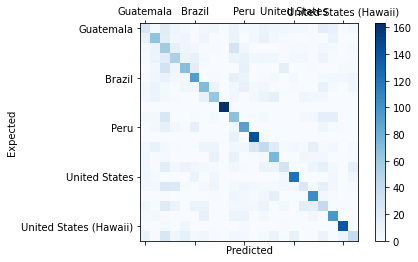

In [18]:
# Make predictions with the model
predictions = model.predict(X_val)  

from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_true=y_val, y_pred=predictions)
print('Confusion matrix:\n', conf_mat)

labels = df_countries['Country.of.Origin'].unique()
fig = plt.figure()
fig.patch.set_facecolor('white')
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

### Hyperparameter Tuning for SVC Model

In [19]:
# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [50,100],
              'kernel': ['rbf','linear'],
              'gamma': [0.001, 0.01]}
grid = GridSearchCV(model, param_grid, cv=4)

In [20]:
# Train the model with GridSearch
# This will take the SVC model and try each combination of parameters

# grid.fit(X_train, y_train)

# print(grid.best_params_)
# print(grid.best_score_)

# Decision Tree Model

In [21]:
from sklearn import tree

# Create and score a decision tree classifier
clfTree = tree.DecisionTreeClassifier(min_samples_split=4)
clf = clfTree.fit(X_train, y_train)

# Make predictions with the hypertuned model
treePredictions = clf.predict(X_val)
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_val, treePredictions))

                              precision    recall  f1-score   support

                      Brazil       0.83      0.77      0.80       138
                       China       0.89      0.92      0.90       155
                    Colombia       0.74      0.75      0.75       147
                  Costa Rica       0.94      0.90      0.92       166
                 El Salvador       0.93      0.93      0.93       160
                    Ethiopia       0.87      0.92      0.90       169
                   Guatemala       0.84      0.79      0.81       156
                    Honduras       0.88      0.94      0.91       140
                       India       1.00      1.00      1.00       163
                   Indonesia       0.95      0.95      0.95       143
                       Kenya       0.93      0.94      0.93       141
                      Malawi       0.99      0.98      0.98       157
                      Mexico       0.83      0.72      0.77       158
                   

In [22]:
# print(f"Test Accuracy: {clf.score(X_test_scaled, y_test)}")

# Random Forest Grid Search

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

model_params = {
    'model': RandomForestClassifier(random_state=5),
    'params' : {
        'n_estimators': [100],  # no of trees
        'min_samples_split':[3, 4],
        'max_samples': [0.2, 0.5]
    }
}

RFclf =  GridSearchCV(model_params['model'], model_params['params'], cv=5, n_jobs=-1, return_train_score=False)
RFclf.fit(X_train, y_train)

print(RFclf.best_params_)
print(RFclf.best_score_)

{'max_samples': 0.5, 'min_samples_split': 3, 'n_estimators': 100}
0.9646464646464645


In [24]:
print(f"Train Accuracy: {RFclf.score(X_train, y_train)}")
print(f"Validation Accuracy: {RFclf.score(X_val, y_val)}")

Train Accuracy: 0.9988552188552189
Validation Accuracy: 0.9696969696969697


In [25]:
print(f"Test Accuracy: {RFclf.score(X_test_scaled, y_test)}")

Test Accuracy: 0.41044776119402987


# XGBOOST Hyper parameter tuning

In [26]:
# from xgboost import XGBClassifier

# XGclf = XGBClassifier(max_depth=5,
#                       n_estimators=[100, 1000])
# XGclf.fit(X_train, y_train)

# # Make predictions with the hypertuned model
# XGPredictions = XGclf.predict(X_val)  
# # Calculate classification report
# print(classification_report(y_val, XGPredictions))

In [27]:
# print(f"Train Accuracy: {XGclf.score(X_train, y_train)}")
# print(f"Test Accuracy: {XGclf.score(X_val, y_val)}")

## UnderSampling

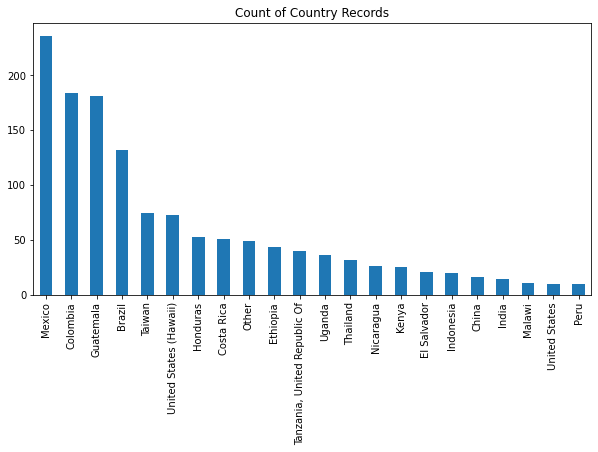

In [28]:
target_count = df_countries['Country.of.Origin'].value_counts()
fig = plt.figure(figsize=(10,5))
fig.patch.set_facecolor('white')
target_count.plot(kind='bar', title='Count of Country Records');

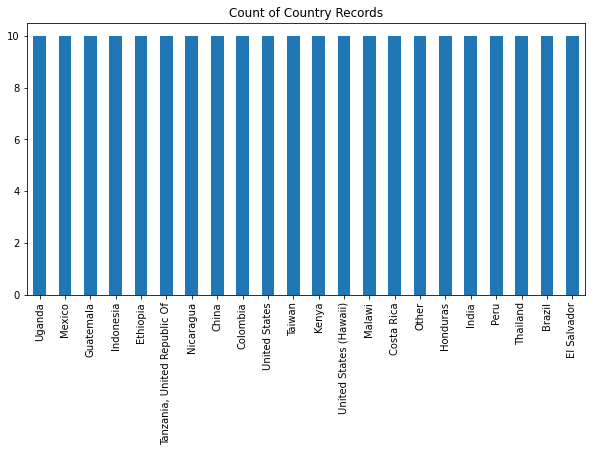

In [29]:
undersample_indices = []
for key, value in country_counts_copy.items():
    indices = df_countries[df_countries['Country.of.Origin'] == key].index
    if value > 10:
        random_indices = np.random.choice(indices, 10, replace=False)
        undersample_indices = np.concatenate([undersample_indices, random_indices])
    else:
        undersample_indices = np.concatenate([undersample_indices, indices])
        
undersample = df_countries.loc[undersample_indices]

target_count = undersample['Country.of.Origin'].value_counts()
fig = plt.figure(figsize=(10,5))
fig.patch.set_facecolor('white')
target_count.plot(kind='bar', title='Count of Country Records');

In [30]:
X_undersampled = undersample.loc[:,df_countries.columns != 'Country.of.Origin']
y_undersampled = undersample.loc[:,df_countries.columns == 'Country.of.Origin']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_undersampled, y_undersampled, random_state=10, test_size=0.1)

X_scaler = StandardScaler().fit(X_train2)

# Transform the training and testing data using the X_scaler
X_train_scaled2 = X_scaler.transform(X_train2)
X_test_scaled2 = X_scaler.transform(X_test2)

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

model_params = {
    'model': RandomForestClassifier(random_state=10),
    'params' : {
        'n_estimators': [50,100,1000],  # no of trees
    }
}

RFclf2 =  GridSearchCV(model_params['model'], model_params['params'], cv=5, n_jobs=4, return_train_score=False)
RFclf2.fit(X_train_scaled2, y_train2)

print(RFclf2.best_params_)
print(RFclf2.best_score_)

C:\Users\Abraham\anaconda3\envs\envcoffee\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'n_estimators': 1000}
0.22166666666666668


In [32]:
print(f"Train Accuracy: {RFclf2.score(X_train_scaled2, y_train2)}")
print(f"Test Accuracy: {RFclf2.score(X_test_scaled2, y_test2)}")

Train Accuracy: 1.0
Test Accuracy: 0.22727272727272727
